In [21]:
# Estudio de la ruleta mediante una Chi - cuadrado. 
# Queremos ver si los valores observados (en este caso seran aleatorios) son compatibles con los valores teoricos. 
# En la ruleta hay 37 numeros del 0 al 36, por lo que cada numero tiene 1/37 posibilidades de salir.
# La simulacion sera de 10 millones de tiradas, por lo que la frecuencia teorica de cada numero sera de 10 millones por 1/37.

In [22]:
# Primero importamos las librerias necesarias:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [23]:
# Generamos 10 millones de tiros con numpy:
tiros_observados = np.random.randint(0, 37, 10000000)
print(tiros_observados)

[27  5 23 ...  1 30 33]


In [24]:
# Ahora contamos la frecuencia de cada numero observado y lo guardamos en un diccinario
freq_dic = {}
for i in range(0, len(tiros_observados)):
    if tiros_observados[i] in freq_dic:
        freq_dic[tiros_observados[i]] += 1
    else:
        freq_dic[tiros_observados[i]] = 1

In [25]:
# Ahora ordenamos y dividimos los numeros y los valores observados
freq = [(i, freq_dic[i]) for i in range(37)]
valores = [i for i in range(37)]
freq_val_observats = [_ for val, _ in freq]
print(valores)
print(freq_val_observats)

# Creamos una lista con las frecuencias teoricas. 
freq_val_teoricos = [10000000 * 1/37 for i in range(37)] 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
[270497, 270152, 270044, 270652, 271100, 269689, 269951, 270252, 269633, 270367, 270921, 269994, 270275, 270141, 270098, 271377, 269409, 269290, 269442, 270599, 269760, 270253, 269761, 270420, 270322, 270442, 270832, 270362, 270846, 270316, 269331, 270547, 270395, 271253, 269961, 270193, 271123]


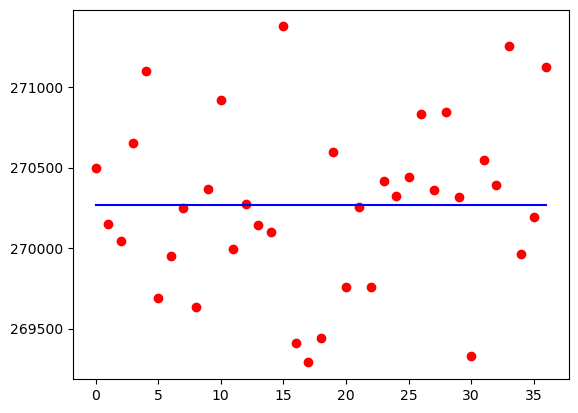

In [26]:
# Ahora ploteamos para ver la distribucion y la desviacion. 
plt.plot(valores, freq_val_teoricos, color = 'blue')
plt.scatter(valores, freq_val_observats, color = 'red')
plt.show()

In [27]:
# Ahora calculamos el valor de la chi cuadrado
chi_cuadrado = sum((freq_val_observats[i] - freq_val_teoricos[i]) ** 2 / freq_val_teoricos[i] for i in range(37))
chi_cuadrado

37.278378

In [28]:
# Para una chi cuadrado con 37 - 1 = 36 parametros de libertad y un nivel de significancia de 0.01 el valor critico es 64, por lo que la hipotesis de que lo observado es la distribucion teorica
# es fiable.
df = 36
alpha = 0.05
valor_critico = stats.chi2.ppf(1-alpha, df)

if chi_cuadrado < valor_critico:
    print(True)

True
